In [1]:
#importing required libraries:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Business Understanding

Riyadh is the capital of Kingdom of Saudi Arabia. The population of Riyadh is nearly 5 million and transportation relies mainly on cars. The motivation of this post is to explore the trends of car sale market in Riyadh.
My intention is to answer the following questions:
1.	What is the most poplar car maker in city Al Riyadh?
2.	What is the average car price?
3.	If the car bought used, what is the average kilometers that the car has been driven?

Understanding these questions may help car maker companies and what the market is really looking for

 ## Data Understanding


This project will use Car sale Dataset From Kaggle, which is a sample of car sale data in Riyadh, Kingdom of Saudi Arabia.
The follwing steps are to better understand the dataset.

In [2]:
#Function to load Data
def reading_car_data(source):
    df = pd.read_csv(source)
    return df

In [3]:
#Loading Data
car_data = reading_car_data('carsclean.csv')

In [4]:
#Exploring
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
city            560 non-null object
car_maker       560 non-null object
model           560 non-null object
year            560 non-null int64
condition       560 non-null object
kilometers      560 non-null float64
transmission    560 non-null object
fuel            560 non-null object
color           560 non-null object
pay_method      560 non-null object
price           560 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 48.2+ KB


In [5]:
# number of rows and columns
car_data.shape

(560, 11)

In [6]:
#Sample
car_data.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4


In [7]:
#descriptive analysis
car_data.describe()

,year,kilometers,price
count,560.000000,560.000000,560.000000
mean,2011.857143,120535.482143,37521.064286
std,3.892236,81305.837563,27022.610673
min,2006.000000,0.000000,2114.000000
25%,2008.000000,39999.500000,19000.000000
50%,2012.500000,149999.500000,27500.000000
75%,2014.250000,200000.000000,58375.000000
max,2019.000000,200000.000000,100000.000000


In [8]:
#Check nulls
car_data.isnull().values.any()

False

## Data Preparation

I will rename the column car_maker to car_brand, and drop un-needed columns.

In [9]:
#Rename columns headers
car_data.rename(columns={'car_maker':'car_brand'}, inplace=True)

In [10]:
car_data.columns

Index(['city', 'car_brand', 'model', 'year', 'condition', 'kilometers',
       'transmission', 'fuel', 'color', 'pay_method', 'price'],
      dtype='object')

In [11]:
# The columns pay_method and color will be dropped as they are un-needed
car_data.drop(['pay_method', 'color'], axis = 1)

,city,car_brand,model,year,condition,kilometers,transmission,fuel,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,22425.4
...,...,...,...,...,...,...,...,...,...
555,Al Riyadh,Dodge,Durango,2012,Used,200000.0,Automatic,Gasoline,35000.0
556,Al Riyadh,Kia,Rio,2015,Used,44999.5,Automatic,Gasoline,10000.0
557,Al Riyadh,BMW,730,2014,Used,114999.5,Automatic,Gasoline,100000.0
558,Al Riyadh,Suzuki,Other,2013,Used,14999.5,Manual,Gasoline,24000.0


### Now dataset is clean and ready to be analyzed!

## Modeling, Evaluation and deployment

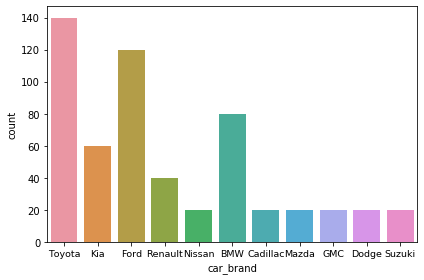

In [12]:
# Question 1)What is the most poplar car maker in city Al Riyadh? 
ax = sns.countplot(x='car_brand', data=car_data)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9.5)
plt.tight_layout()
plt.show()

In [13]:
# Question # 2) What is the average car price?
print(car_data['price'].mean())


37521.06428571428


In [14]:
# test
mean_car = car_data.groupby(['car_brand']).mean().sort_values('price', ascending=False)
mean_car

,year,kilometers,price
car_brand,,,
BMW,2009.000000,178749.875000,62500.0
Toyota,2013.285714,100714.071429,58375.0
Cadillac,2008.000000,174999.500000,40000.0
Nissan,2009.000000,200000.000000,36000.0
Dodge,2012.000000,200000.000000,35000.0
Ford,2013.333333,141666.416667,26160.8
Suzuki,2013.000000,14999.500000,24000.0
GMC,2007.000000,200000.000000,22000.0
Mazda,2013.000000,154999.500000,16000.0


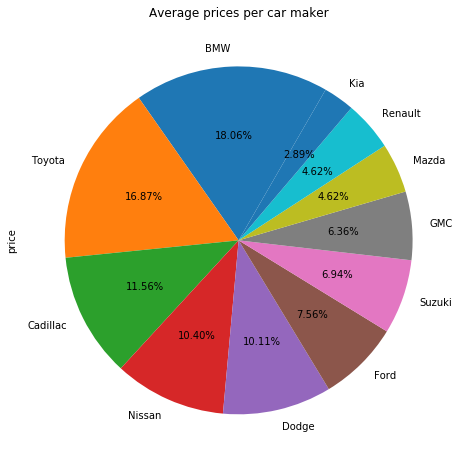

In [15]:
#Plot
mean_car.plot( y = 'price',use_index=True, figsize=(10,8), kind='pie', title='Average prices per car maker' 
              ,autopct='%1.2f%%',legend = None,startangle=60)

### Althogh Toyata is the most poplar car maker, however it is the second most expensive brand.
##### Why ?
I have found this interviw for Mr. Takayuki Yoshitsugu, chief representative of Toyota Motor Corporation in the Middle East and North Africa. To Quote his response on the poplarity and why Toyta own 35% of the market share in Kingdom of Saudi Arabia;
> Toyota is always working to provide ever better cars which exhibit the enduring attributes of performance, design, quality, durability and reliability that Toyota has become synonymous for.



## References :
https://www.arabnews.com/motoring/news/897836

In [16]:
# Question 3) If the car bought used, what is the average kilometers that the car has been driven?
used_car = car_data.groupby(car_data['condition']).mean().sort_values('kilometers', ascending=False)
used_car

,year,kilometers,price
condition,,,
Used,2011.592593,124999.759259,35262.585185
New,2019.000000,0.000000,98500.000000


In [17]:
row = used_car.iloc[0]
row

year            2011.592593
kilometers    124999.759259
price          35262.585185
Name: Used, dtype: float64

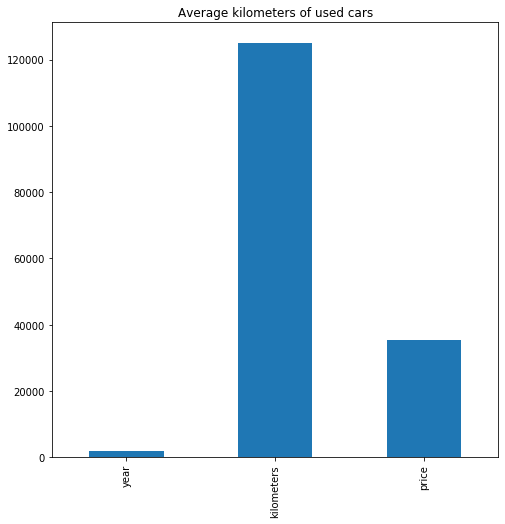

In [18]:
#Plot
row.plot( use_index=True, figsize=(8,8), kind='bar', title='Average kilometers of used cars' 
              ,legend = None ,y='kilometers' )

### Data Source:
https://www.kaggle.com/energykingdom/saudi-arabia-car-prices-machine-learning
